<a href="https://colab.research.google.com/github/hoangxtr/form_detection/blob/master/ShippingLabelDetection_allv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install lib & download files

In [ ]:
! pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

clear_output()

In [ ]:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu110/torch1.7/index.html

clear_output()

In [ ]:
# Annotated-20210812

%cd /content/
!gdown --id 1I0_oQcyiKS9TRCNNGzHvNFsamnLLRxFB

!unzip /content/Annotated-20210812.zip
!rm /content/Annotated-20210812.zip

clear_output()

In [ ]:
# Config

!gdown --id 1VpCSyUFoKB4UHYVftUxTa8c0PWLZ5DUF -O /content/Shipping_label_LVIS_R50_hybrid.yaml

Downloading...
From: https://drive.google.com/uc?id=1VpCSyUFoKB4UHYVftUxTa8c0PWLZ5DUF
To: /content/Shipping_label_LVIS_R50_hybrid.yaml
100% 858/858 [00:00<00:00, 1.66MB/s]


In [ ]:
# 301-400

# !gdown --id 1gXeJWCHBmfgvrawEOP9dO25W3fkNgl1T
# !unzip 301-400.zip
# !rm 301-400.zip

!gdown --id 10_FR4Xm_fW-nGgv6Sm1dpuFLma1Ck_PE
!unrar x /content/301-400.rar
!rm /content/301-400.rar

clear_output()

### Convert data

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json 

plt.rcParams["figure.figsize"] = (10,10)

import statistics

In [ ]:
def draw_bbox(img, instance):
  img = img.copy()

  if instance['type'] == 'bbox':
    x1,x2,y1,y2 = np.asarray(list(instance['points'].values()), dtype=np.int32)
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
  elif instance['type'] == 'point':
    img = cv2.circle(img, (int(instance['x']), int(instance['y'])), 15, (0,255,0), -1)
  else:
    pts = np.asarray(instance['points'], dtype=np.int32).reshape(-1, 1, 2)
    for pt in pts:
      img = cv2.circle(img, tuple(pt[0]), 10, (255, 0, 255), -1)
    print(f'number point: {len(pts)}')
    cv2.polylines(img, [pts], True, (0, 0, 255), 2)
  return img

In [ ]:
def polygon2bbox(polygon):
  pts = np.asarray(polygon['points'], dtype='int').reshape(-1, 2)
  x1 = np.min(pts[:,0])
  x2 = np.max(pts[:,0])
  y1 = np.min(pts[:,1])
  y2 = np.max(pts[:,1])
  return int(x1),int(y1),int(x2),int(y2)

In [ ]:
def polygon2bbox(polygon):
  pts = np.asarray(polygon['points'], dtype='int').reshape(-1, 2)
  x1,y1,w,h = cv2.boundingRect(pts)
  return x1,y1,x1+w, y1+h

In [ ]:
def get_instances_with_id(_id, list_instances):
  return list(filter(lambda x: x['groupId'] == _id, list_instances))

#### Vizualize

**Report**  
- index: 9 | annot/Toan Nguyen (121 -135) fail keypoint
- index: 10 | annot_138 fail keypoint
- nhiều case số lượng bbox, keypoint, polygon không đồng nhất, vd 381
- keypoint bị đánh sai 350

In [ ]:
len(ANNOT_LIST)

13

In [ ]:
position = 5
ANNOT_LIST[position]

'/content/Annotated-20210812/Tri Le (61-75)/Label/annotations.json'

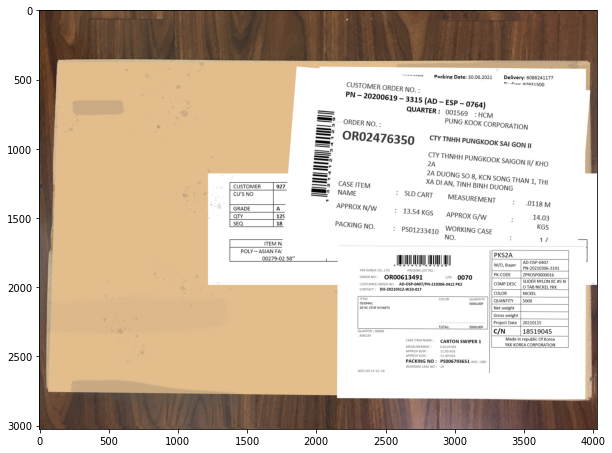

In [ ]:
# annot_path = '/content/Annotated-20210812/Quang Tran (1-15)/1-15Photo Annotate/annotations.json'
annot_path = ANNOT_LIST[position]
image_name = '63.jpg'
img = cv2.imread(annot_path[:-16] + 'images/' + image_name)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

with open(annot_path, 'r') as f:
  temp = json.load(f)

In [ ]:

polygons = []
bboxes = []
points = []
for i in range(len(temp[image_name]['instances'])):
  _kind = temp[image_name]['instances'][i]['type']
  print(_kind)
  if _kind == 'point':
    points.append(temp[image_name]['instances'][i])
  elif _kind == 'bbox':
    bboxes.append(temp[image_name]['instances'][i])
  elif _kind == 'polygon':
    polygons.append(temp[image_name]['instances'][i])
  # print(temp[image_name]['instances'][i]['type'])

print(len(bboxes))
print(len(polygons))
print(len(points))

# print(statistics.mode([len(bboxes), len(polygons), len(points)/4]))


point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
polygon
bbox
polygon
bbox
polygon
bbox
polygon
3
4
16


In [ ]:
for temp in points:
  print(temp)

{'type': 'point', 'classId': 2, 'probability': 100, 'x': 121.7, 'y': 350.9, 'groupId': 0, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 2, 'probability': 100, 'x': 148.2, 'y': 1509.8, 'groupId': 2, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 2, 'probability': 100, 'x': 2131.2, 'y': 1154.6, 'groupId': 1, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 3, 'probability': 100, 'x': 3003.8, 'y': 684.2, 'groupId': 4, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 3, 'probability': 100, 'x': 2007.7, 'y': 354.7, 'groupId': 3, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 3, 'probability': 100, 'x': 2094.8, 'y': 1506, 'groupId': 2, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 

In [ ]:
temp1 = list(filter(lambda x: x['groupId'] == 4, points))
for i in temp1:
  print(i)

{'type': 'point', 'classId': 3, 'probability': 100, 'x': 3003.8, 'y': 684.2, 'groupId': 4, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 6, 'probability': 100, 'x': 954.9, 'y': 687.5, 'groupId': 4, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 8, 'probability': 100, 'x': 958.6, 'y': 1778.7, 'groupId': 4, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}
{'type': 'point', 'classId': 9, 'probability': 100, 'x': 3011.3, 'y': 1767.3, 'groupId': 4, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}


In [ ]:
ID_OF_ANNOTS[position]

[[1, 2, 6], [3, 7], [4, 8], [5, 9]]

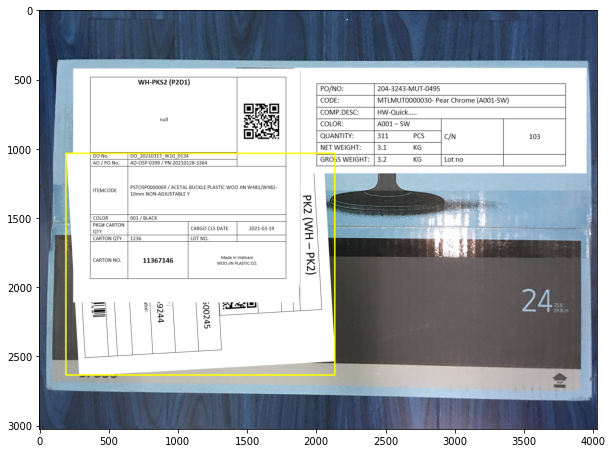

In [ ]:
merge_list_points = polygons[0]['points'] + polygons[1]['points']
x1,y1,w,h = cv2.boundingRect(np.array(merge_list_points).reshape(-1,2).astype(np.int32))
x2, y2 = x1+w, y1+h

ret_img = img.copy()
ret_img = cv2.rectangle(ret_img, (x1,y1), (x2,y2), (255,255,0), 10, -1)

plt.imshow(ret_img)

{'type': 'point', 'classId': 6, 'probability': 100, 'x': 1891.3, 'y': 1861, 'groupId': 7, 'pointLabels': {}, 'locked': False, 'visible': True, 'attributes': []}


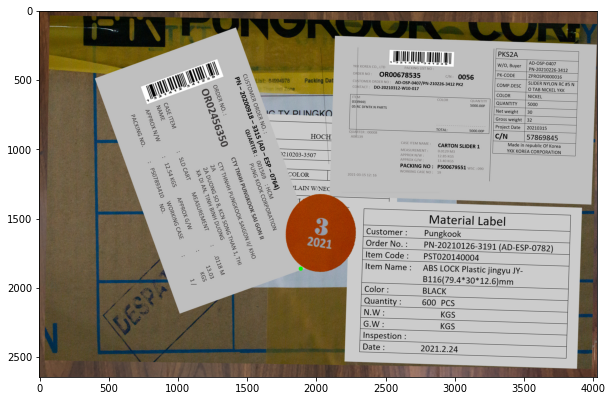

In [ ]:
ret_img = img.copy()
temp = 4
ret_img = draw_bbox(ret_img, temp1[temp])
print(temp1[temp])

plt.imshow(cv2.cvtColor(ret_img, cv2.COLOR_BGR2RGB))

1
[{'type': 'point', 'classId': 5, 'probability': 100, 'x': 2161.35009765625, 'y': 2776.514892578125, 'groupId': 1, 'pointLabels': {}, 'locked': False, 'visible': False, 'attributes': []}, {'type': 'point', 'classId': 6, 'probability': 100, 'x': 3937, 'y': 2792.7, 'groupId': 1, 'pointLabels': {}, 'locked': False, 'visible': False, 'attributes': []}, {'type': 'point', 'classId': 4, 'probability': 100, 'x': 3940.75634765625, 'y': 1701.18505859375, 'groupId': 1, 'pointLabels': {}, 'locked': False, 'visible': False, 'attributes': []}, {'type': 'point', 'classId': 3, 'probability': 100, 'x': 2159.042724609375, 'y': 1709.6485595703125, 'groupId': 1, 'pointLabels': {}, 'locked': False, 'visible': False, 'attributes': []}]
<class 'int'>
2
[{'type': 'point', 'classId': 10, 'probability': 100, 'x': 3793.7, 'y': 1931.3, 'groupId': 2, 'pointLabels': {}, 'locked': False, 'visible': False, 'attributes': []}, {'type': 'point', 'classId': 5, 'probability': 100, 'x': 1757.179443359375, 'y': 1765.163574

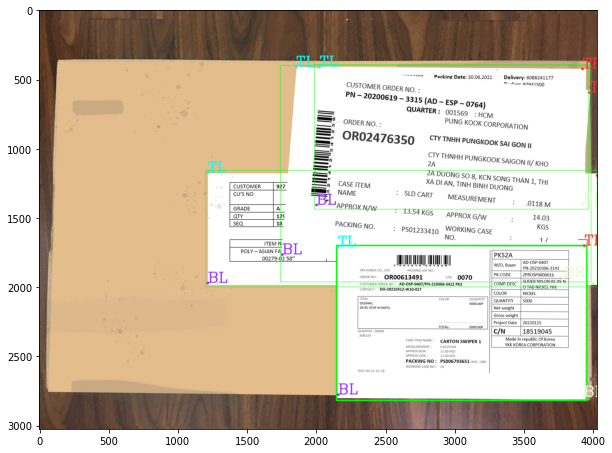

In [ ]:
COLOR_LIST = [(255,255,0), (51,51,255), (255,51,153), (204,255,229)]
tl_ids, tr_ids, bl_ids, br_ids = ID_OF_ANNOTS[position]
ret_img = img.copy()
try:
  total_instances = statistics.mode((len(bboxes), len(polygons), len(points)//4))
except: 
  total_instances = min(len(bboxes), len(polygons), len(points)//4)

total_instances = 4
for _id in range(1, total_instances+1):
  # if _id != 3:
  #   continue
  print(_id)
  bbox = get_instances_with_id(_id, bboxes)
  polygon = get_instances_with_id(_id, polygons)
  keypoints = get_instances_with_id(_id, points)
  print(keypoints)
  try:
    if len(bbox) == 0:
      x1,y1,x2,y2 = polygon2bbox(polygon[0])
      print(type(x1))
      ret_img = cv2.rectangle(ret_img, (x1,y1), (x2,y2), (0,255,0), 10)
    else:
      ret_img = draw_bbox(ret_img, bbox[0])
  except: 
    print('fail bbox')

  for keypoint in keypoints:
    # print(keypoint)
    x = int(keypoint['x'])
    y = int(keypoint['y'])
    # ret_img = draw_bbox(ret_img, keypoint)
    if keypoint['classId'] in tl_ids:
      text = 'TL'
      color_id = 0
    elif keypoint['classId'] in tr_ids:
      text = 'TR'
      color_id = 1
    elif keypoint['classId'] in bl_ids:
      text = 'BL'
      color_id = 2
    elif keypoint['classId'] in br_ids:
      text = 'BR'
      color_id = 3
    else:
      print('error')
    ret_img = cv2.circle(ret_img, (x,y), 10, COLOR_LIST[color_id], -1)
    ret_img = cv2.putText(ret_img, text, (x, y-5), cv2.FONT_HERSHEY_COMPLEX, 3.5, COLOR_LIST[color_id], 5)


plt.imshow(cv2.cvtColor(ret_img, cv2.COLOR_BGR2RGB))


In [ ]:
  tl_

#### Process

In [ ]:
cd /content/

/content


In [ ]:
!rm -r /content/result/
!rm /content/annotations.json

rm: cannot remove '/content/result/': No such file or directory
rm: cannot remove '/content/annotations.json': No such file or directory


In [ ]:
# !rm -r /content/result
# !rm /content/annotations.json

!mkdir result

# hoangxtr
import os
import cv2
from tqdm import tqdm
import json
import shutil

IMAGE_FOLDERS = [
          '301-400/images/', 
          '/content/Annotated-20210812/Quang Tran (1-15)/1-15Photo Annotate/images/',
          '/content/Annotated-20210812/Nam Tran (16 - 30)/annotate_shipping_label/images/',
          '/content/Annotated-20210812/Huy Le (31 - 45)/images/',
          '/content/Annotated-20210812/Thy Nguyen (46- 60)/Annotate_Label_Support_46_60/images/',
          '/content/Annotated-20210812/Tri Le (61-75)/Label/images/',
          '/content/Annotated-20210812/Tuan Ngoc Tran (76 - 90)/Annotate76_90/images/',
          '/content/Annotated-20210812/Thien_Trung_Truong_91_105/Jun11 ThienTruong/images/',
          '/content/Annotated-20210812/Nhac Vo (105-120)/images/',
          # '/content/Annotated-20210812/Toan Nguyen (121 -135)/images/',
          '/content/Annotated-20210812/Gia Pham (136-150)/images/',
          '/content/Annotated-20210812/Tho Pham (151 - 165)/Label_Recognition/images/',
          '/content/Annotated-20210812/Nha Le/annotate_nhale/images/',
          '/content/Annotated-20210812/Tuan Hoang Tran (181 - 200)/Shipping_Annotate/images/'
]
ANNOT_LIST = [
          '301-400/annotations.json', 
          '/content/Annotated-20210812/Quang Tran (1-15)/1-15Photo Annotate/annotations.json',
          '/content/Annotated-20210812/Nam Tran (16 - 30)/annotate_shipping_label/annotations.json',
          '/content/Annotated-20210812/Huy Le (31 - 45)/annotations.json',
          '/content/Annotated-20210812/Thy Nguyen (46- 60)/Annotate_Label_Support_46_60/annotations.json',
          '/content/Annotated-20210812/Tri Le (61-75)/Label/annotations.json',
          '/content/Annotated-20210812/Tuan Ngoc Tran (76 - 90)/Annotate76_90/annotations.json',
          '/content/Annotated-20210812/Thien_Trung_Truong_91_105/Jun11 ThienTruong/annotations.json',
          '/content/Annotated-20210812/Nhac Vo (105-120)/annotations.json',
          # '/content/Annotated-20210812/Toan Nguyen (121 -135)/annotations.json',
          '/content/Annotated-20210812/Gia Pham (136-150)/annotations.json',
          '/content/Annotated-20210812/Tho Pham (151 - 165)/Label_Recognition/annotations.json',
          '/content/Annotated-20210812/Nha Le/annotate_nhale/annotations.json',
          '/content/Annotated-20210812/Tuan Hoang Tran (181 - 200)/Shipping_Annotate/annotations.json'
]

ID_OF_ANNOTS = [
    [[2,6], [3,7], [5,9], [4,8]], # 2
    [[2,6], [3,7], [5,9], [4,8]], # 2
    [[1,5], [2,6], [4,8], [3,7]], # 1
    [[1,5], [2,6], [4,8], [3,7]], # 1
    [[2,6], [3,7], [5,9], [4,8]], # 2
    [[3,7], [4,8], [5,9], [6,10]],
    [[2,6], [3,7], [5,9], [4,8]],
    [[1,2,6], [3,7], [4,8], [5,9]], # update
    [[5,9], [2,6], [3,7], [4,8]],
    # [[5,9], [6,10], [8,12], [7,11]],
    [[1,5], [2,6, 9], [4,8], [3,7]],
    [[1,5], [2,6], [4,8], [3,7]],
    [[2,6], [3,7], [5,9], [4,8]],
    [[2,6], [3,7], [5,9], [4,8]],
]

# ID_OF_ANNOT = [[[2,6], [3,7], [5,9], [4,8]]]
# TL_IDS = [2,6]
# TR_IDS = [3,7]
# BL_IDS = [5,9]
# BR_IDS = [4,8]
# skeleton indicate the connection between keypoints, ect: [0,1] indicate that top_left is connect to top_right (when draw bounding box)
json_write = {"images": [],"categories": [{"supercategory": "shippping_label", "id": 1, "name": "shippping_label", "keypoints": ["top_left", "top_right", "bottom_left", "bottom_right"], "skeleton": [[0, 1], [0, 2], [1, 3], [2, 3]]}],
              "annotations":[]}
num = 0
num_id = 0

In [ ]:
skip_name = ['137.jpg', '141.jpg', '150.jpg', '117.jpg', '138.jpg', '350.jpg', '104.jpg']
def process(annot_name, image_folder, json_write, id_of_annot):
  global num
  global num_id
  with open(annot_name, 'r') as f:
    temp = json.load(f)
  del temp['___sa_version___']

  TL_IDS, TR_IDS, BL_IDS, BR_IDS = id_of_annot

  for img_name, info in temp.items():
    # print('Start Name ***********************************************')
    num += 1
    h,w,_ = cv2.imread(os.path.join(image_folder, img_name)).shape

    image_anno = {}
    image_anno["height"] = h
    image_anno["width"] = w
    image_anno["id"] = num
    image_anno["file_name"] = str(num) + '.jpg'
    
    bbox_instances = list(filter(lambda x: x['type'] == 'bbox', info['instances']))
    polygon_instances = list(filter(lambda x: x['type'] == 'polygon', info['instances']))
    point_instances = list(filter(lambda x: x['type'] == 'point', info['instances']))

    all_ids = np.unique(list(map(lambda x: x['groupId'], point_instances)))
    valid_ids = []

    # try:
    #   number_instances = statistics.mode((len(bbox_instances), len(polygon_instances), len(point_instances)//4)) 
    # except:
    #   print(f'number kinds of annot is not consistency: {img_name}')
    #   number_instances = min(len(bbox_instances), len(polygon_instances), len(point_instances)//4)
  
    number_instances = len(point_instances) // 4 
    
    # benchmark_instance = polygon_instances if len(polygon_instances) == number_instances else bbox_instances

    if img_name in skip_name: continue


    
    annot_objs = []

    error_ids = []

    for _id in all_ids:
      num_id += 1
      # print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

      bbox = get_instances_with_id(_id, bbox_instances)
      polygon = get_instances_with_id(_id, polygon_instances)
      keypoints = get_instances_with_id(_id, point_instances)
      if len(keypoints) < 4:
        if len(error_ids) == 0:
          error_ids += [_id]
          continue
        else:
          keypoints += get_instances_with_id(error_ids[0], point_instances)
          error_ids.pop(0)
      if len(bbox) == 0 and len(polygon) == 0:
        print('Nham id')
        continue
      if len(bbox) == 0: # bbox nổi => lấy từ polygon duy nhất
        try:
          x1,y1,x2,y2 = polygon2bbox(polygon[0])
        except: 
          print(f'DEBUG: {img_name}\tcheckpoint 1')
          print(f'len keyponts: {len(keypoints)}')
          print(f'groupId: {_id}')
          continue
      else:
        # ret_img = draw_bbox(ret_img, bbox[0])
        x1,y1,x2,y2 = bbox[0]['points']['x1'], bbox[0]['points']['y1'], bbox[0]['points']['x2'], bbox[0]['points']['y2']
      
      # print(bbox_instances[i])
      # x1,y1, x2, y2 = bbox_instances[i]['points']['x1'], bbox_instances[i]['points']['y1'], bbox_instances[i]['points']['x2'], bbox_instances[i]['points']['y2']
      # tl, tr, bl, br = (x1, y1), (x2, y1), (x1,y2), (x2,y2)
      annot_obj = {}
      annot_obj['iscrowd'] = 0
      annot_obj['image_id'] = num
      annot_obj['id'] = num_id
      annot_obj['category_id'] = 1
      annot_obj['num_keypoints'] = 4
      try:
        if len(polygon) == 0:
          annot_obj['segmentation'] = [[x1,y1,x2,y1,x2,y2,x1,y2]]  
        else:
          annot_obj['segmentation'] = [temp_polygon['points'] for temp_polygon in polygon]
          # annot_obj['segmentation'] = polygon[0]['points']
      except:
        print(f'DEBUG: {img_name}\tcheckpoint 2')
        print(len(polygon))
        # print(len(bbox_instances))
        continue
      annot_obj['bbox'] = [x1,y1, x2 - x1, y2-y1] # x,y,w,h
      keypoints_value = []

      continue_flag = False
      for ids in id_of_annot:
        checkFind = False
        for keypoint in keypoints:
          if keypoint['classId'] in ids:
            keypoints_value += [keypoint['x'], keypoint['y'], int(keypoint['visible'])+1]
            checkFind = True
            break
        if not checkFind:
          # print(ids)
          print(f'DEBUG: {img_name}\tcheckpoint 3')
          # print(keypoints)
          continue_flag = True
      if continue_flag:
        continue

      # for ind, pos in enumerate([tl, tr, bl, br]):
      #   # print('_______________________________________________')
      #   # print(pos)
      #   pos = np.asarray(pos).reshape(1,2)
      #   # print(f'{ind}: \t{keypoint_components_coor[ind]}')
      #   try:
      #     index = np.argmin(np.linalg.norm(keypoint_components_coor[ind] - pos, axis=1))
      #     # print(f'list result: {np.linalg.norm(keypoint_components_coor[ind] - pos, axis=1)}\n')
      #     keypoints_value += [keypoint_components_instance[ind][index]['x'], keypoint_components_instance[ind][index]['y'], int(keypoint_components_instance[ind][index]['visible']) + 1]
      #     # print(f'best: {keypoints_value[-3:]}')
      #   except:
      #     print(f'keypoint_components_coor: {keypoint_components_coor[ind]}')
      #     print(f'ind: {ind}')
      #     raise ValueError(annot_name + '\t' + img_name)
      if len(keypoints_value) != 12:
        # print(f'Error when searching keypoint for instance {img_name}')
        print(f'DEBUG: {img_name}\tcheckpoint 4')
        continue
      annot_obj['keypoints'] = keypoints_value
      annot_objs.append(annot_obj)


    shutil.copy(os.path.join(image_folder, img_name), os.path.join( 'result/', str(num) + '.jpg') )
    json_write["images"].append(image_anno)
    json_write["annotations"] += annot_objs


In [ ]:
for i in range(len(IMAGE_FOLDERS)):
  process(ANNOT_LIST[i], IMAGE_FOLDERS[i], json_write, ID_OF_ANNOTS[i])

with open('/content/annotations.json', "w") as outfile:
  json.dump(json_write, outfile)

#### Register and viz Dataset

In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
register_coco_instances("shipping_label", {},
                            "/content/annotations.json",
                            "/content/result")

keypoint_names = ["top_left", "top_right", "bottom_left", "bottom_right"]
keypoint_flip_map = []
MetadataCatalog.get(f"shipping_label").keypoint_names = keypoint_names
MetadataCatalog.get(f"shipping_label").keypoint_flip_map = keypoint_flip_map

In [ ]:
from IPython import display
import PIL

def cv2_imshow(a):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(a))

In [ ]:
from detectron2.utils.visualizer import Visualizer
import cv2

my_dataset_train_metadata = MetadataCatalog.get("shipping_label")
dataset_dicts = DatasetCatalog.get("shipping_label")

import random
from detectron2.utils.visualizer import Visualizer

# for d in random.sample(dataset_dicts, 10):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
#     vis = visualizer.draw_dataset_dict(d)
#     cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
dataset_dicts[0].keys()

dict_keys(['file_name', 'height', 'width', 'image_id', 'annotations'])

In [ ]:
annot = dataset_dicts[0]['annotations']
annot[0]['segmentation']

/content/result/12.jpg


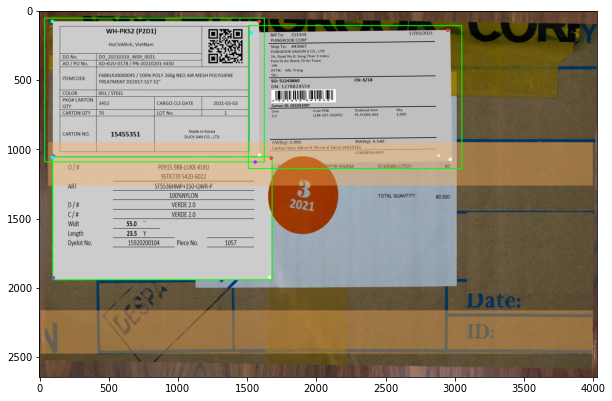

/content/result/13.jpg


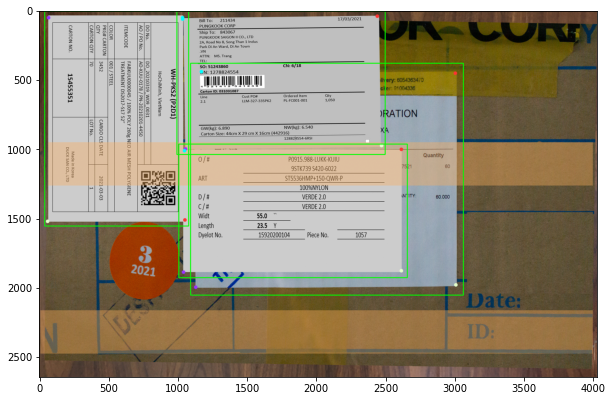

/content/result/14.jpg


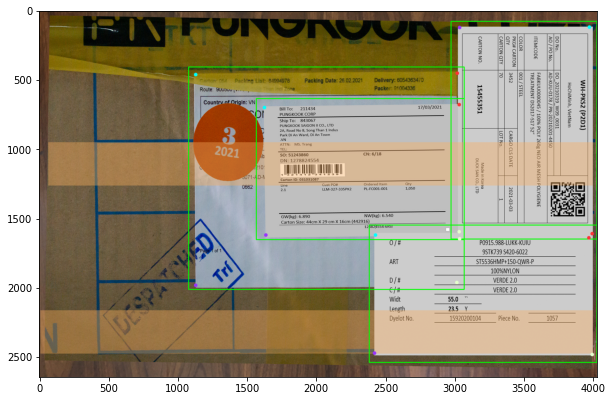

/content/result/15.jpg


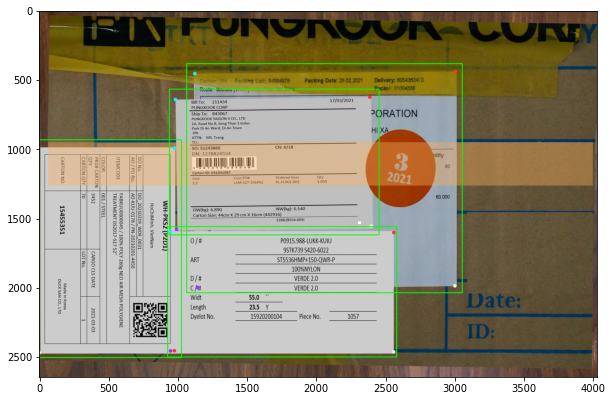

/content/result/16.jpg


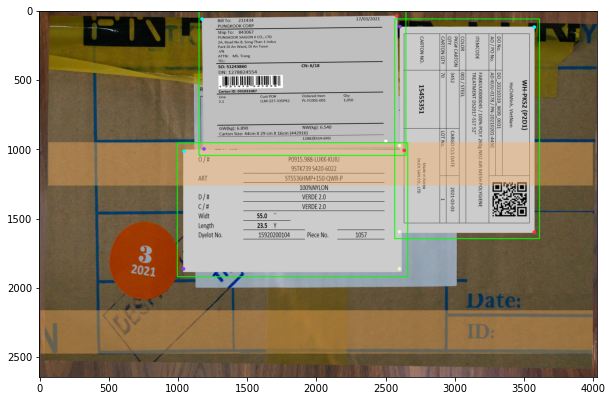

/content/result/17.jpg


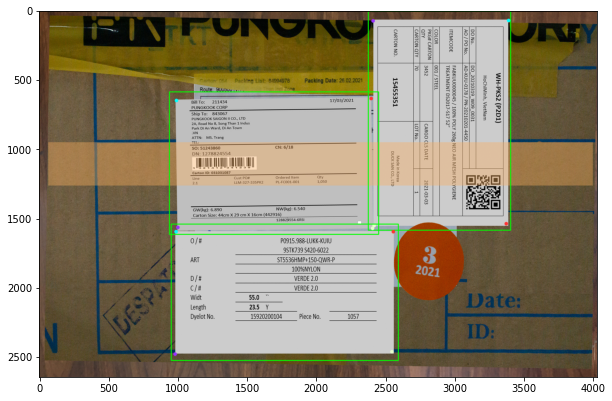

/content/result/18.jpg


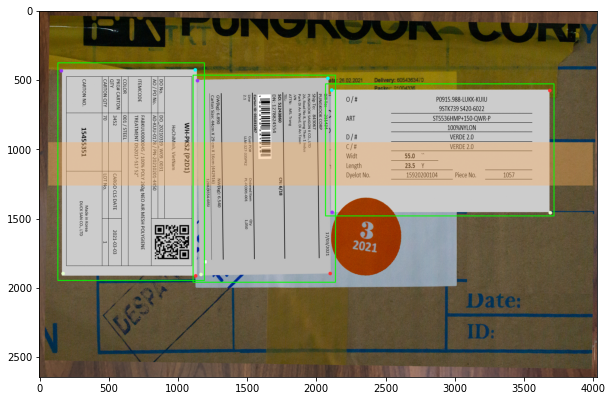

/content/result/19.jpg


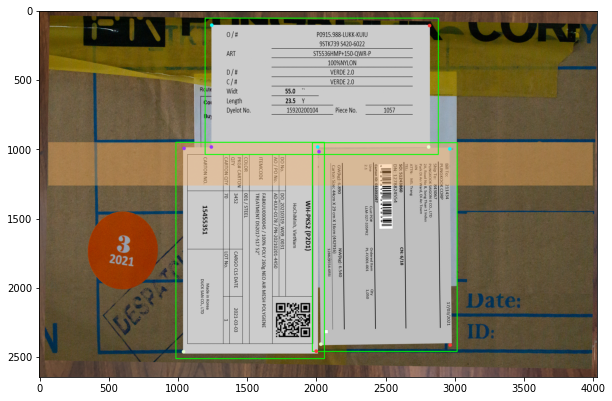

/content/result/20.jpg


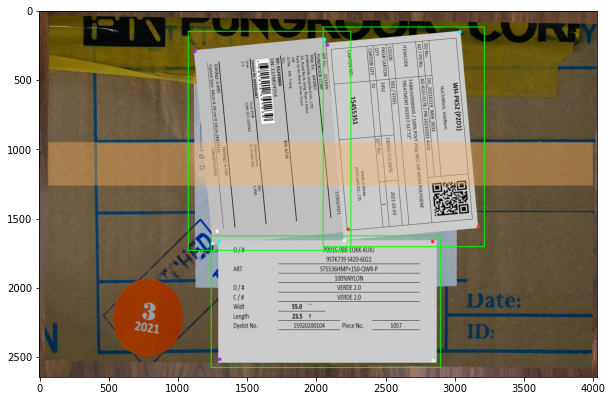

/content/result/21.jpg


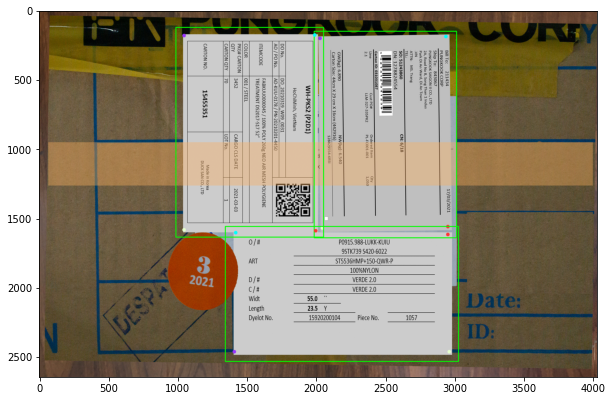

In [ ]:
COLOR_LIST = [(255,255,0), (51,51,255), (255,51,153), (204,255,229)]
# for d in random.sample(dataset_dicts, 5):
for i in range(10, 20):
  d = dataset_dicts[i]
  # print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
  # print(d['file_name'])
  img = cv2.imread(d['file_name'])
  print(d['file_name'])
  for annot in d['annotations']:
    x1,y1,w,h = np.asarray(annot['bbox'], dtype=np.int32)
    tl,tr,bl,br = np.asarray(np.array(annot['keypoints']).reshape(-1,3)[:, :2], dtype=np.int32)
    img = cv2.rectangle(img, (x1,y1), (x1+w,y1+h), (0,255,0), 5)
    for _id,pos in enumerate([tl,tr,bl,br]):
      # print(pos)
      img = cv2.circle(img, tuple(pos), 13, COLOR_LIST[_id], -1)
    # print('__________________')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

### Training

In [ ]:
!git clone https://github.com/xingyizhou/CenterNet2
%cd /content/CenterNet2/projects/CenterNet2

Cloning into 'CenterNet2'...
remote: Enumerating objects: 11053, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 11053 (delta 65), reused 140 (delta 56), pack-reused 10888
Receiving objects: 100% (11053/11053), 4.62 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (7958/7958), done.
/content/CenterNet2/projects/CenterNet2


In [ ]:
!mkdir '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/new_mask/'
!ls '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/new_mask'


In [ ]:
!ls '/content/drive/MyDrive/Copy of FormDetectionData/model'

hoang_model_0019999.pth  model_0020999.pth  model_0054999.pth
model_0004999.pth	 model_0029999.pth  model_0064999.pth
model_0009999.pth	 model_0034999.pth  model_0074999.pth
model_0014999.pth	 model_0044999.pth


In [ ]:
!ls '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/mask'

config.yaml					   model_0022499.pth
events.out.tfevents.1636602407.a4773150ef44.538.0  model_0022999.pth
events.out.tfevents.1636602572.a4773150ef44.606.0  model_0023499.pth
last_checkpoint					   model_0023999.pth
log.txt						   model_0024499.pth
metrics.json					   model_0024999.pth
model_0021499.pth				   model_0025499.pth
model_0021999.pth


In [ ]:
! python train_net.py --resume  --config-file /content/Shipping_label_LVIS_R50_hybrid.yaml \
--num-gpus 1 MODEL.WEIGHTS '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/new_mask/model_0069999.pth' \
OUTPUT_DIR '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/new_mask/' \
SOLVER.BASE_LR 0.0005 SOLVER.CHECKPOINT_PERIOD 500

Command Line Args: Namespace(config_file='/content/Shipping_label_LVIS_R50_hybrid.yaml', dist_url='tcp://127.0.0.1:18206', eval_only=False, machine_rank=0, manual_device='', num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/new_mask/model_0069999.pth', 'OUTPUT_DIR', '/content/drive/MyDrive/Copy of FormDetectionData/new_300forms_save_folder/new_mask/', 'SOLVER.BASE_LR', '0.0005', 'SOLVER.CHECKPOINT_PERIOD', '500'], resume=True)
Config '/content/Shipping_label_LVIS_R50_hybrid.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[11/20 06:28:53 detectron2]: Rank of current process: 0. World size: 1
[11/20 06:28:54 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.5 @/usr/l